# StudentShield: A Data-Driven Approach to Early Identification of At-Risk Students
https://archive.ics.uci.edu/dataset/320/student+performance

# 01 EDA

## 1. Setups and Imports

In [46]:
from ucimlrepo import fetch_ucirepo
from ucimlrepo import fetch_ucirepo
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from utils import save_dataframe




## 2. Load Data

In [13]:
# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
# print(student_performance.metadata)

# variable information
print(student_performance.variables)
df = pd.concat([X, y], axis=1)

          name     role         type      demographic  \
0       school  Feature  Categorical             None   
1          sex  Feature       Binary              Sex   
2          age  Feature      Integer              Age   
3      address  Feature  Categorical             None   
4      famsize  Feature  Categorical            Other   
5      Pstatus  Feature  Categorical            Other   
6         Medu  Feature      Integer  Education Level   
7         Fedu  Feature      Integer  Education Level   
8         Mjob  Feature  Categorical       Occupation   
9         Fjob  Feature  Categorical       Occupation   
10      reason  Feature  Categorical             None   
11    guardian  Feature  Categorical             None   
12  traveltime  Feature      Integer             None   
13   studytime  Feature      Integer             None   
14    failures  Feature      Integer             None   
15   schoolsup  Feature       Binary             None   
16      famsup  Feature       B

## 3. Data Overview

In [8]:
#quick overview
print("\n DataFrame Head:")
print("=" * 60)
print(df.head())

print("\n Shape:")
print("=" * 60)
print(df.shape)

print("\n Info:")
print("=" * 60)
df.info()

print("\n Summary Statistics (Numerical):")
print("=" * 60)
display(df.describe())

print("\n Summary Statistics (Categorical):")
print("=" * 60)
display(df.describe(include=['object']))


          name     role         type      demographic  \
0       school  Feature  Categorical             None   
1          sex  Feature       Binary              Sex   
2          age  Feature      Integer              Age   
3      address  Feature  Categorical             None   
4      famsize  Feature  Categorical            Other   
5      Pstatus  Feature  Categorical            Other   
6         Medu  Feature      Integer  Education Level   
7         Fedu  Feature      Integer  Education Level   
8         Mjob  Feature  Categorical       Occupation   
9         Fjob  Feature  Categorical       Occupation   
10      reason  Feature  Categorical             None   
11    guardian  Feature  Categorical             None   
12  traveltime  Feature      Integer             None   
13   studytime  Feature      Integer             None   
14    failures  Feature      Integer             None   
15   schoolsup  Feature       Binary             None   
16      famsup  Feature       B

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000



 Summary Statistics (Categorical):


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


## 4. Missing Values

In [9]:
#check missing values
print("\n Missing Values per Column:")
print("=" * 60)
missing = df.isna().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found ")


 Missing Values per Column:
No missing values found 


## 5. Unique Values per Column

In [12]:
#unique values per column (distinct values in the column)
print("\n Unique Values per Feature:")
print("=" * 60)
for col in df.columns:
    print(f"{col:20} {df[col].nunique()}")


🧩 Unique Values per Feature:
school               2
sex                  2
age                  8
address              2
famsize              2
Pstatus              2
Medu                 5
Fedu                 5
Mjob                 5
Fjob                 5
reason               4
guardian             3
traveltime           4
studytime            4
failures             4
schoolsup            2
famsup               2
paid                 2
activities           2
nursery              2
higher               2
internet             2
romantic             2
famrel               5
freetime             5
goout                5
Dalc                 5
Walc                 5
health               5
absences             24
G1                   17
G2                   16
G3                   17


## 6. Target Distribution

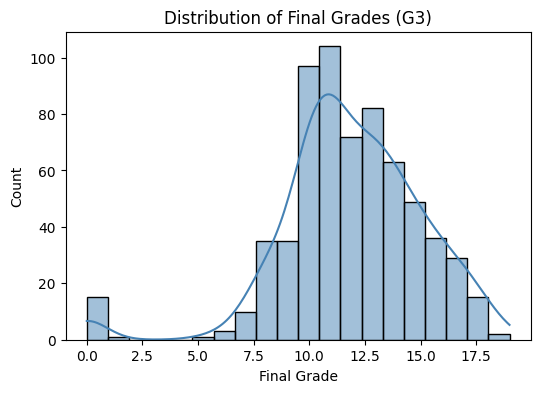

In [14]:
#target distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["G3"], bins=20, kde=True, color="steelblue")
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()


## 7. Correlation


In [16]:
# Feature name mapping
feature_names = {
    "school": "School (Gabriel Pereira or Mousinho da Silveira)",
    "sex": "Student's sex (F = female, M = male)",
    "age": "Student's age",
    "address": "Home address type (U = urban, R = rural)",
    "famsize": "Family size (LE3 = ≤3, GT3 = >3)",
    "Pstatus": "Parent’s cohabitation status (T = together, A = apart)",
    "Medu": "Mother’s education (0–4)",
    "Fedu": "Father’s education (0–4)",
    "Mjob": "Mother’s job",
    "Fjob": "Father’s job",
    "reason": "Reason to choose this school",
    "guardian": "Student’s guardian",
    "traveltime": "Home-to-school travel time (1–4)",
    "studytime": "Weekly study time (1–4)",
    "failures": "Number of past class failures (n < 3)",
    "schoolsup": "Extra educational support (yes/no)",
    "famsup": "Family educational support (yes/no)",
    "paid": "Extra paid classes (yes/no)",
    "activities": "Extracurricular activities (yes/no)",
    "nursery": "Attended nursery school (yes/no)",
    "higher": "Wants higher education (yes/no)",
    "internet": "Internet access at home (yes/no)",
    "romantic": "In a romantic relationship (yes/no)",
    "famrel": "Quality of family relationships (1–5)",
    "freetime": "Free time after school (1–5)",
    "goout": "Going out with friends (1–5)",
    "Dalc": "Workday alcohol consumption (1–5)",
    "Walc": "Weekend alcohol consumption (1–5)",
    "health": "Current health status (1–5)",
    "absences": "Number of school absences",
    "G1": "First period grade (0–20)",
    "G2": "Second period grade (0–20)",
    "G3": "Final grade (target, 0–20)",
}


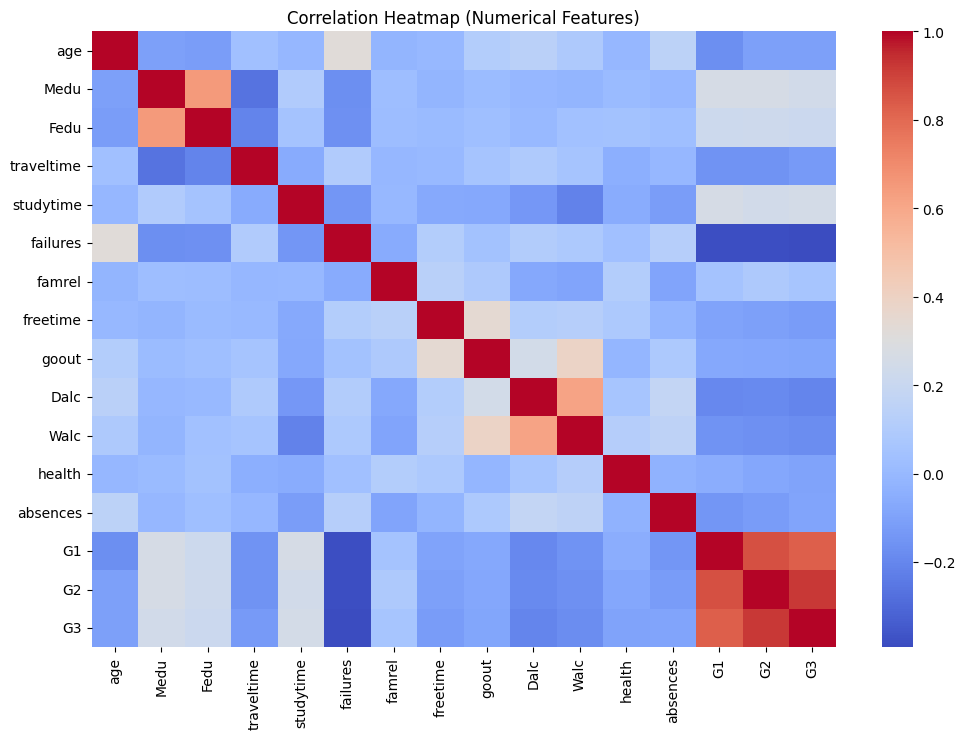


 Top correlations with Final Grade (G3):
G3         (Final grade (target, 0–20)                                 1.000
G2         (Second period grade (0–20)                                 0.919
G1         (First period grade (0–20)                                  0.826
studytime  (Weekly study time (1–4)                                    0.250
Medu       (Mother’s education (0–4)                                   0.240
Fedu       (Father’s education (0–4)                                   0.212
famrel     (Quality of family relationships (1–5)                      0.063
goout      (Going out with friends (1–5)                              -0.088
absences   (Number of school absences                                 -0.091
health     (Current health status (1–5)                               -0.099
age        (Student's age                                             -0.107
freetime   (Free time after school (1–5)                              -0.123
traveltime (Home-to-school travel 

In [21]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

print("\n Top correlations with Final Grade (G3):")
print("=" * 60)
sorted = corr["G3"].sort_values(ascending=False)
for col, value in sorted.items():
    desc = feature_names.get(col, "---")
    print(f"{col:10} ({desc:55}  {value:>7.3f}")


## 8. Feature Exploration


 Feature-Target Relationship Inspection

 High positive correlations with G3


/var/folders/4g/23r9mqgj2hdgg8pv2_5x0qzm0000gn/T/ipykernel_60221/1929095505.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="studytime", y="G3", data=df, ax=axes[1,0], palette="Blues")
/var/folders/4g/23r9mqgj2hdgg8pv2_5x0qzm0000gn/T/ipykernel_60221/1929095505.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Medu", y="G3", data=df, ax=axes[1,1], palette="Greens")
/var/folders/4g/23r9mqgj2hdgg8pv2_5x0qzm0000gn/T/ipykernel_60221/1929095505.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Fedu", y="G3", data=df, ax=axes[0],

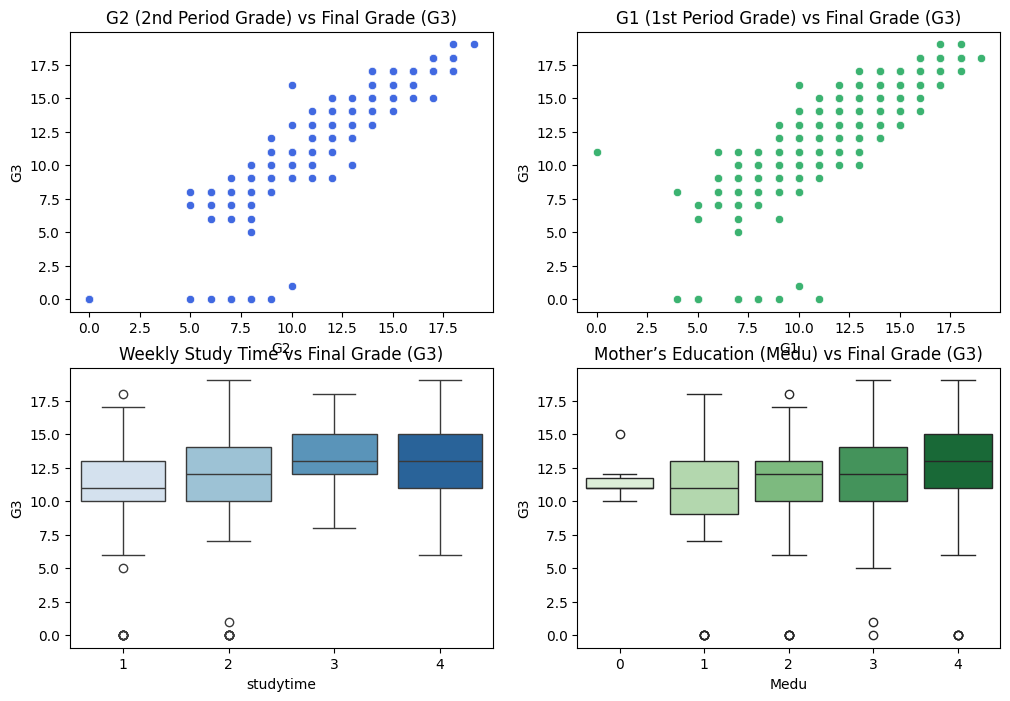

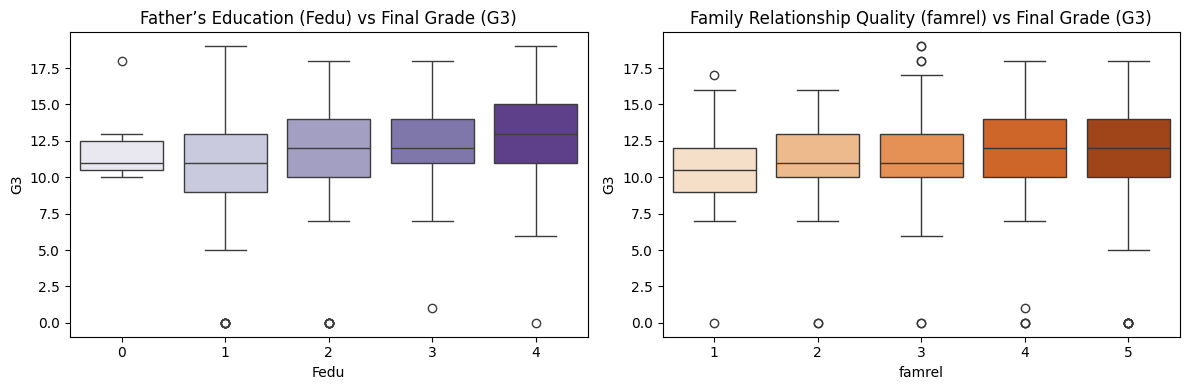


 Negative positive correlations with G3


/var/folders/4g/23r9mqgj2hdgg8pv2_5x0qzm0000gn/T/ipykernel_60221/1929095505.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="failures", y="G3", data=df, ax=axes[0,0], palette="Reds")
/var/folders/4g/23r9mqgj2hdgg8pv2_5x0qzm0000gn/T/ipykernel_60221/1929095505.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dalc", y="G3", data=df, ax=axes[0,1], palette="Reds")
/var/folders/4g/23r9mqgj2hdgg8pv2_5x0qzm0000gn/T/ipykernel_60221/1929095505.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Walc", y="G3", data=df, ax=axes[1,0], p

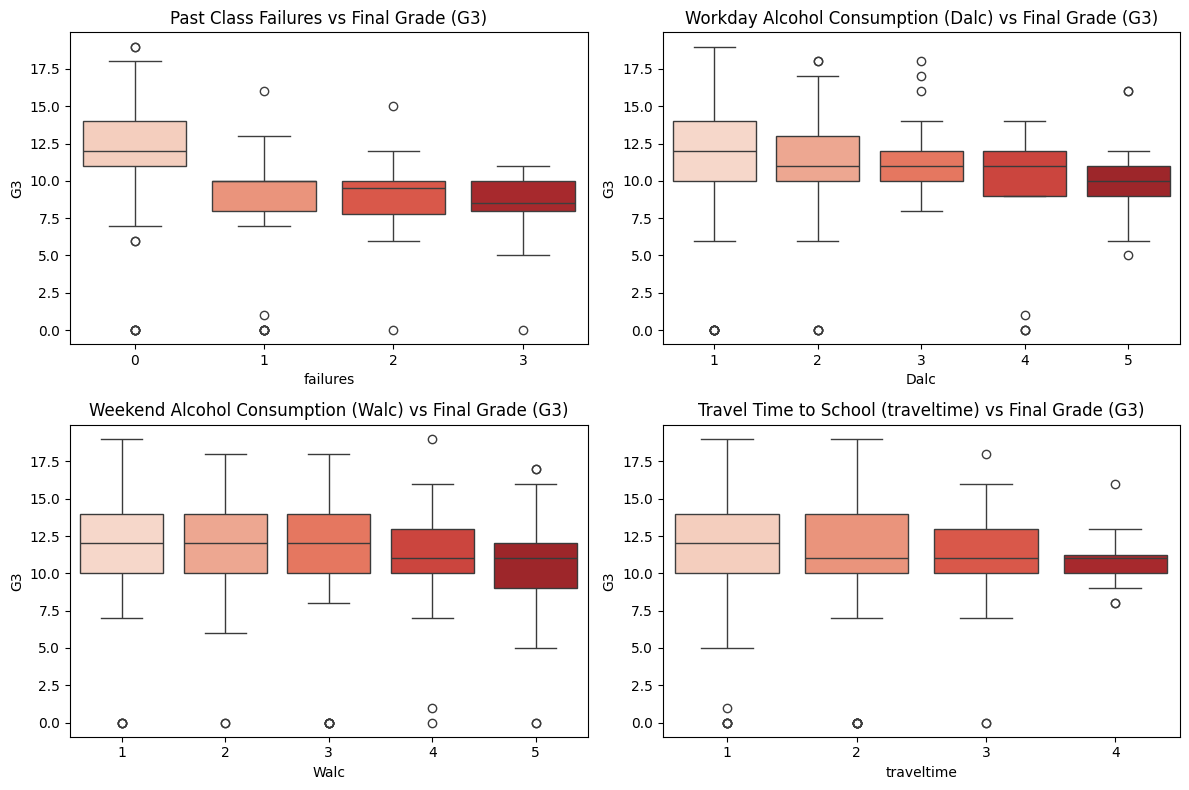

In [29]:
print("\n Feature-Target Relationship Inspection")
print("=" * 70)

# High positive correlations with G3
print("\n High positive correlations with G3")


fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(x="G2", y="G3", data=df, ax=axes[0,0], color="royalblue")
axes[0,0].set_title("G2 (2nd Period Grade) vs Final Grade (G3)")

sns.scatterplot(x="G1", y="G3", data=df, ax=axes[0,1], color="mediumseagreen")
axes[0,1].set_title("G1 (1st Period Grade) vs Final Grade (G3)")

sns.boxplot(x="studytime", y="G3", data=df, ax=axes[1,0], palette="Blues")
axes[1,0].set_title("Weekly Study Time vs Final Grade (G3)")

sns.boxplot(x="Medu", y="G3", data=df, ax=axes[1,1], palette="Greens")
axes[1,1].set_title("Mother’s Education (Medu) vs Final Grade (G3)")


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x="Fedu", y="G3", data=df, ax=axes[0], palette="Purples")
axes[0].set_title("Father’s Education (Fedu) vs Final Grade (G3)")

sns.boxplot(x="famrel", y="G3", data=df, ax=axes[1], palette="Oranges")
axes[1].set_title("Family Relationship Quality (famrel) vs Final Grade (G3)")

plt.tight_layout()
plt.show()

# Features suspected to have weak or negative correlation
print("\n Negative positive correlations with G3")


fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="failures", y="G3", data=df, ax=axes[0,0], palette="Reds")
axes[0,0].set_title("Past Class Failures vs Final Grade (G3)")

sns.boxplot(x="Dalc", y="G3", data=df, ax=axes[0,1], palette="Reds")
axes[0,1].set_title("Workday Alcohol Consumption (Dalc) vs Final Grade (G3)")

sns.boxplot(x="Walc", y="G3", data=df, ax=axes[1,0], palette="Reds")
axes[1,0].set_title("Weekend Alcohol Consumption (Walc) vs Final Grade (G3)")

sns.boxplot(x="traveltime", y="G3", data=df, ax=axes[1,1], palette="Reds")
axes[1,1].set_title("Travel Time to School (traveltime) vs Final Grade (G3)")

plt.tight_layout()
plt.show()



In [35]:
# =========================================================
#  HOW TO READ BOXPLOTS
# =========================================================
# Boxplots summarize how data is distributed and help compare groups visually.
#
# Key parts:
# - Box: middle 50% of data (interquartile range, IQR)
# - Line inside the box: median (middle value)
# - Whiskers: general range of the data
# - Dots outside whiskers: outliers (very high or low values)
#
# How to interpret:
# - Higher box on the y-axis: better grades / higher values
# - Lower box: worse grades / lower values
# - Narrower box: consistent results (low variation)
# - Wider box: more variation
# - Separated boxes: clear difference between groups (strong relationship)
# - Overlapping boxes: similar distributions (weak or no relationship)
#
# - studytime vs G3: Higher studytime = higher box = better grades
# - failures vs G3: More failures = lower box = worse grades
# - Dalc/Walc vs G3: More alcohol = lower boxes = slightly worse grades
# - Medu/Fedu vs G3: Higher parental education = higher boxes = better outcomes
# =========================================================


# =========================================================
# HOW TO READ SCATTERPLOTS
# =========================================================
# Scatterplots show the relationship between two numeric variables.
# Each point = one student.
#
# x-axis: independent variable (e.g., G1 or G2)
# y-axis: dependent variable (e.g., final grade G3)
#
# How to interpret:
# - Upward trend → positive correlation (as x increases, y increases)
# - Downward trend → negative correlation (as x increases, y decreases)
# - No clear trend → no significant relationship
# - Tight clustering → strong correlation
# - Wide scatter → weak or inconsistent correlation
# - Outliers → unusual cases (students performing unexpectedly high or low)
#
# Quick visual summary:
# Upward slope: positive relationship
# Downward slope: negative relationship
# Scattered cloud: no clear relationship
# Tight diagonal: strong correlation
# utliers: unusual students worth examining
# =========================================================



In [36]:
print("\n Useful Insights:")
print("=" * 60)
print(f"- Average final grade (G3): {df['G3'].mean():.2f}")
print(f"- Median absences: {df['absences'].median()}")
print(f"- Study time range: {df['studytime'].min()} – {df['studytime'].max()}")
print(f"- Students with >10 absences: {(df['absences'] > 10).sum()} ({(df['absences'] > 10).mean()*100:.1f}%)")
print(f"- Students with G3 < 10 (at risk): {(df['G3'] < 10).sum()} ({(df['G3'] < 10).mean()*100:.1f}%)")



 Useful Insights:
- Average final grade (G3): 11.91
- Median absences: 2.0
- Study time range: 1 – 4
- Students with >10 absences: 49 (7.6%)
- Students with G3 < 10 (at risk): 100 (15.4%)


In [47]:
# Save your EDA output for preprocessing
eda_output_path = save_dataframe(df, "eda_output")

File already exists. Overwriting data/eda_output.csv
DataFrame saved successfully.


## EDA Summary

### **1. Dataset Overview**
- The dataset contains records of students from two Portuguese secondary schools, with ~650 samples and 33 attributes covering demographics, family, school performance, and social factors.

The target variable is G3 (final grade), ranging from 0 to 20.

### **2. Data Integrity**
- No missing values.
- All categorical and numeric columns looks like to have no noticeable errors.

### **3. Feature Exploration**
- The strongest positive correlations with the final grade (G3) are:
    - G2.
    - G1.
    - Earlier grades are highly predictive of final grade.

- Other mildly positive correlations:

    - studytime, Medu, Fedu, famrel: weak positive impact.

- Negative correlations:

    - failures (−0.40), Dalc and Walc (≈ −0.20), traveltime (≈ −0.13).

    - Slightly decrease performance.

freetime, age, health, and goout have little to no effect.

### **4. Visual Insights**
- Scatterplots of G1/G2 vs G3 show strong linear relationships.
- Boxplots: they are quite well-distributed, with some outliers and wide range of grades in some places.

- Higher parental education indicates better outcome.
- studytime positive trend.
- Those with past failures or higher alcohol use consistently perform worse.
- Travel time and family relations show minimal difference in outcomes.


### **5. Observations**

- Earlier grades are excellent indicators of final success.
- Socio-academic factors (study time, parental education) matter more than social or lifestyle variables.
- No strong biased is observed. (Alcohol consumption, gender bias, free-time)

[Grading System](https://en.wikipedia.org/wiki/Academic_grading_in_Portugal)
About 15% of students fall below the “passing” threshold (G3 < 10).
